In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [3]:
from sentence_transformers import SentenceTransformer
import umap
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [4]:
df = pd.read_csv('df_2023.csv') 

In [5]:
df

,Client Name,Project Name,TECH-Mgmt,Tech Score,RAIDD
0,Apply Digital,Tech Accelerator,Ignacio Miranda,Neutral,Development Work:\nActualizando componentes de...
1,Atlassian,Knowledge Base Platform,Mariana Valdespino,Neutral,NaN
2,Caja Los Andes,TAPP Mobile,Junior Martinez,Neutral,RISKS:\n\n - Se están modificando los figmas y...
3,Caja Los Andes,TAPP Web,Juan Romero,Neutral,RISKS:\nN/A\n\nASSUMPTIONS:\nN/A\n\nISSUES:\nN...
4,Curran,MVP,Daniel Perez,Neutral,RISKS:\n\n1. Loni y Joe ya no estan en el equi...
...,...,...,...,...,...
782,Moderna,SpikeVax,Juan Romero,Neutral,RISKS: \nN/A\n\nASSUMPTIONS:\nSe espera que pa...
783,Moderna,Platform,Joaquín Téllez,Neutral,RISKS\n1. Okta va a eliminar una funcionalidad...
784,Moderna,Finance,Jhonder Quintero,Neutral,RISKS\nEl cliente quiere ver los avances en ap...
785,Harvard,HBS,Rodrigo Flandez,Neutral,RISK\n- Se está reconstruyendo la libreria de ...


### Tutorial
* (agregado) Eliminar filas con NaN en la columna 'RAIDD'
* Eliminar espacios extras y saltos de linea
* (agregado por ser ESP) reemplazar vocales con tildes
* Eliminar puntuaciones y simbolos
* Pasar todo a minuscula

#### Eliminando NaN


In [6]:
df.dropna(subset=['RAIDD'], inplace=True)

In [7]:
# En este caso se puede observar que la observacion [1] fue descartada (en comparacion al print de df en el apartado anterior 'Librerias y CSV'
df

,Client Name,Project Name,TECH-Mgmt,Tech Score,RAIDD
0,Apply Digital,Tech Accelerator,Ignacio Miranda,Neutral,Development Work:\nActualizando componentes de...
2,Caja Los Andes,TAPP Mobile,Junior Martinez,Neutral,RISKS:\n\n - Se están modificando los figmas y...
3,Caja Los Andes,TAPP Web,Juan Romero,Neutral,RISKS:\nN/A\n\nASSUMPTIONS:\nN/A\n\nISSUES:\nN...
4,Curran,MVP,Daniel Perez,Neutral,RISKS:\n\n1. Loni y Joe ya no estan en el equi...
6,Embonor,APP B2B,Ever Aliaga,Neutral,Risks:\n\n- Riesgo de subestimación: Subestima...
...,...,...,...,...,...
782,Moderna,SpikeVax,Juan Romero,Neutral,RISKS: \nN/A\n\nASSUMPTIONS:\nSe espera que pa...
783,Moderna,Platform,Joaquín Téllez,Neutral,RISKS\n1. Okta va a eliminar una funcionalidad...
784,Moderna,Finance,Jhonder Quintero,Neutral,RISKS\nEl cliente quiere ver los avances en ap...
785,Harvard,HBS,Rodrigo Flandez,Neutral,RISK\n- Se está reconstruyendo la libreria de ...


#### Eliminando espacios extra

In [8]:
df['RAIDD'].iloc[0]

'Development Work:\nActualizando componentes del Homepage y Catalog según nuevos diseños.\n\nRisks:\n- Ya no tendremos a un QA de E2E, esta tarea se relegó a los mismos devs. Podría implicar retrasos en la implementación.\n- El equipo dev se verá reducido en 3 integrantes durante las próximas semanas, si no logramos avanzar rápido con los tickets, el desarrollo será muy lento durante Enero, pudiendo no lograr la fecha esperada para entregar el MVP.\nAssumptions:\n- N/A\nIssues:\n- N/A\nDecisions:\n- N/A\nDependencies:\n- Dependiendo del avance del equipo, puede que tengamos dependencias de diseño. Por ahora, esto no supone un problema.'

In [9]:
#El tutirial utiliza 'doc' como un string, en este caso sería cada fila de df
# Se utiliza la funcion 'clean_text' para luego aplicar mediante lambds a cada fila
def clean_text(text):
  cleaned_text = re.sub("\s+", " ", text)
  return cleaned_text

df['RAIDD'] = df['RAIDD'].apply(lambda x: clean_text(str(x))) 

In [10]:
df['RAIDD']

0      Development Work: Actualizando componentes del...
2      RISKS: - Se están modificando los figmas y hem...
3      RISKS: N/A ASSUMPTIONS: N/A ISSUES: N/A DECISI...
4      RISKS: 1. Loni y Joe ya no estan en el equipo....
6      Risks: - Riesgo de subestimación: Subestimar e...
                             ...                        
782    RISKS: N/A ASSUMPTIONS: Se espera que para est...
783    RISKS 1. Okta va a eliminar una funcionalidad ...
784    RISKS El cliente quiere ver los avances en apr...
785    RISK - Se está reconstruyendo la libreria de c...
786    RISKS: 1. Queda un mes para entregar el MVP, s...
Name: RAIDD, Length: 744, dtype: object

#### Reemplazo de Tildes

In [11]:
def limpiar_tilde(texto):

  texto = texto.replace('á', 'a')
  texto = texto.replace('é', 'e')
  texto = texto.replace('í', 'i')
  texto = texto.replace('ó', 'o')
  texto = texto.replace('ú', 'u')
  return texto

df['RAIDD'] = df['RAIDD'].astype(str).apply(limpiar_tilde)

In [12]:
df['RAIDD'].iloc[3]

'RISKS: 1. Loni y Joe ya no estan en el equipo. 2. Posiblemente necesitemos nuevas llaves para el reCAPTCHA en el nuevo sitio de Synsisal. ASSUMPTIONS: 1. Puede que se generen errores en produccion cuando se de live al sitio de Synsisal. Ahora se esta usando el endpoint de staging en produccion, por lo que puede que tengamos alguna diferencia entre los endpoints. ISSUES: 1. Existe un issue con la feature de Contentful live preview que no permite ver la actualizacion del contenido en la ventana de la web app, solo sucede en algunos casos y con un reload suele solventarse, sin embargo, puede generar confusion a los content authors. DECISIONS: 1.Se coloco el endpoint de staging en produccion para el sitio de Synsisal. ya que aun no se a publicado el sitio y para Thomas es complicado cambiar las URLs para aceptar peticiones y arreglar el error de CORS. Con esto poder hacer pruebas E2E 2.Se empezo los tickets relacionados con el Core Web Vitals para mejorar la velocidad del sitio en general

#### Eliminación de puntuaciones

In [13]:
df['RAIDD'].iloc[4]

'Risks: - Riesgo de subestimacion: Subestimar el tiempo o los recursos necesarios para reutilizar o actualizar los servicios existentes. - Riesgo de definicion de producto: Dificultades en la definicon del producto por parte del cliente para KyC. * Se realizan entrevistas semanales con los equipos tecnivos para entender los sistemas actuales. * El equipo de producto y UX/UI esta trabajando con el cliente para cerrar las definiciones pendientes. Assumptions: N/A Issues: - Documentacion tecnica desactualizada. El equipo esta trabajando en actualizarla. - Multiples Gitflows en uso. Se esta trabajando en documentar el mas actualizado. - El cliente no tiene una vision clara de los servicios compartidos. Se esta trabajando en un inventario de servicios. Decisions: - Decision sobre priorizacion: Determinar que servicios se deben reutilizar, actualizar o desarrollar desde cero, priorizando segun el impacto y la viabilidad. Dependencies: - Dependencia de la revision tecnica: La determinacion de

In [14]:
def clean_punct(text):
  cleaned_text = re.sub("[^-9A-Za-z ]", "", text)
  return cleaned_text
    
df['RAIDD'] = df['RAIDD'].apply(lambda x: clean_punct(str(x)))

In [15]:
df['RAIDD'].iloc[4]

'Risks - Riesgo de subestimacion Subestimar el tiempo o los recursos necesarios para reutilizar o actualizar los servicios existentes - Riesgo de definicion de producto Dificultades en la definicon del producto por parte del cliente para KyC  Se realizan entrevistas semanales con los equipos tecnivos para entender los sistemas actuales  El equipo de producto y UXUI esta trabajando con el cliente para cerrar las definiciones pendientes Assumptions NA Issues - Documentacion tecnica desactualizada El equipo esta trabajando en actualizarla - Multiples Gitflows en uso Se esta trabajando en documentar el mas actualizado - El cliente no tiene una vision clara de los servicios compartidos Se esta trabajando en un inventario de servicios Decisions - Decision sobre priorizacion Determinar que servicios se deben reutilizar actualizar o desarrollar desde cero priorizando segun el impacto y la viabilidad Dependencies - Dependencia de la revision tecnica La determinacion de que servicios pueden reut

#### Todo a minusculas

In [16]:
df.head(3)

,Client Name,Project Name,TECH-Mgmt,Tech Score,RAIDD
0,Apply Digital,Tech Accelerator,Ignacio Miranda,Neutral,Development Work Actualizando componentes del ...
2,Caja Los Andes,TAPP Mobile,Junior Martinez,Neutral,RISKS - Se estan modificando los figmas y hemo...
3,Caja Los Andes,TAPP Web,Juan Romero,Neutral,RISKS NA ASSUMPTIONS NA ISSUES NA DECISIONS Ya...


In [17]:
def lowercase_conv(text):

  text_clean = "".join([i.lower() for i in text if i not in string.punctuation])
  return text_clean

df['RAIDD'] = df['RAIDD'].apply(lowercase_conv)

In [18]:
df['RAIDD']

0      development work actualizando componentes del ...
2      risks  se estan modificando los figmas y hemos...
3      risks na assumptions na issues na decisions ya...
4      risks  loni y joe ya no estan en el equipo  po...
6      risks  riesgo de subestimacion subestimar el t...
                             ...                        
782    risks na assumptions se espera que para este s...
783    risks  okta va a eliminar una funcionalidad qu...
784    risks el cliente quiere ver los avances en apr...
785    risk  se esta reconstruyendo la libreria de co...
786    risks  queda un mes para entregar el mvp sin e...
Name: RAIDD, Length: 744, dtype: object

#### Tokenizar el texto

In [19]:
df['RAIDD_tokens'] = df['RAIDD'].astype(str).apply(lambda x: x.lower().split())

In [20]:
df['RAIDD_tokens']

0      [development, work, actualizando, componentes,...
2      [risks, se, estan, modificando, los, figmas, y...
3      [risks, na, assumptions, na, issues, na, decis...
4      [risks, loni, y, joe, ya, no, estan, en, el, e...
6      [risks, riesgo, de, subestimacion, subestimar,...
                             ...                        
782    [risks, na, assumptions, se, espera, que, para...
783    [risks, okta, va, a, eliminar, una, funcionali...
784    [risks, el, cliente, quiere, ver, los, avances...
785    [risk, se, esta, reconstruyendo, la, libreria,...
786    [risks, queda, un, mes, para, entregar, el, mv...
Name: RAIDD_tokens, Length: 744, dtype: object

#### Eliminar stop words

In [21]:
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

df['RAIDD_tokens_filtered'] = df['RAIDD_tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df['RAIDD_tokens_filtered']
# los 'na' abundan y no aportan valor en los reportes

0      [development, work, actualizando, componentes,...
2      [risks, estan, modificando, figmas, perdido, i...
3      [risks, na, assumptions, na, issues, na, decis...
4      [risks, loni, joe, estan, equipo, posiblemente...
6      [risks, riesgo, subestimacion, subestimar, tie...
                             ...                        
782    [risks, na, assumptions, espera, sprint, cree,...
783    [risks, okta, va, eliminar, funcionalidad, usa...
784    [risks, cliente, quiere, ver, avances, aprox, ...
785    [risk, reconstruyendo, libreria, componentes, ...
786    [risks, queda, mes, entregar, mvp, embargo, de...
Name: RAIDD_tokens_filtered, Length: 744, dtype: object

In [23]:
# Lista de stopwords adicionales
extra_stopwords = ['na', 'risks', 'risk', 'assumptions', 'assumption', 'issues', 'issue', 'dependencies', 'decisions', 'decision']

def filter_stopwords(tokens, extra_stopwords=[]):
    combined_stopwords = stop_words.union(set(extra_stopwords))
    return [word for word in tokens if word not in combined_stopwords]

# Aplicar la función para filtrar stopwords a la columna 'RAIDD_tokens'
df['RAIDD_tokens_filtered'] = df['RAIDD_tokens'].apply(lambda tokens: filter_stopwords(tokens, extra_stopwords))

In [24]:
print(df[['RAIDD_tokens', 'RAIDD_tokens_filtered']].head())

                                        RAIDD_tokens  \
0  [development, work, actualizando, componentes,...   
2  [risks, se, estan, modificando, los, figmas, y...   
3  [risks, na, assumptions, na, issues, na, decis...   
4  [risks, loni, y, joe, ya, no, estan, en, el, e...   
6  [risks, riesgo, de, subestimacion, subestimar,...   

                               RAIDD_tokens_filtered  
0  [development, work, actualizando, componentes,...  
2  [estan, modificando, figmas, perdido, informac...  
3  [repositorios, principales, creados, continuar...  
4  [loni, joe, estan, equipo, posiblemente, neces...  
6  [riesgo, subestimacion, subestimar, tiempo, re...  


In [25]:
# Unir los tokens filtrados en una sola cadena
df['RAIDD_filtered'] = df['RAIDD_tokens_filtered'].apply(lambda tokens: ' '.join(tokens))

print(df[['RAIDD_tokens_filtered', 'RAIDD_filtered']].head())

                               RAIDD_tokens_filtered  \
0  [development, work, actualizando, componentes,...   
2  [estan, modificando, figmas, perdido, informac...   
3  [repositorios, principales, creados, continuar...   
4  [loni, joe, estan, equipo, posiblemente, neces...   
6  [riesgo, subestimacion, subestimar, tiempo, re...   

                                      RAIDD_filtered  
0  development work actualizando componentes home...  
2  estan modificando figmas perdido informacion f...  
3  repositorios principales creados continuaremos...  
4  loni joe estan equipo posiblemente necesitemos...  
6  riesgo subestimacion subestimar tiempo recurso...  


#### Crear Embeddings
Representación numérica de palabras o frases en un espacio vectorial continuo. Esta representación permite capturar el significado semántico de las palabras a través de vectores que pueden ser utilizados para medir distancias y similitudes entre palabras.

In [26]:
model = SentenceTransformer('all-mpnet-base-v2') 
df['embeddings'] = df['RAIDD_filtered'].apply(lambda x: model.encode(x))

In [27]:
df.head(3)

,Client Name,Project Name,TECH-Mgmt,Tech Score,RAIDD,RAIDD_tokens,RAIDD_tokens_filtered,RAIDD_filtered,embeddings
0,Apply Digital,Tech Accelerator,Ignacio Miranda,Neutral,development work actualizando componentes del ...,"[development, work, actualizando, componentes,...","[development, work, actualizando, componentes,...",development work actualizando componentes home...,"[0.038052525, -0.019838875, -0.035550658, -0.0..."
2,Caja Los Andes,TAPP Mobile,Junior Martinez,Neutral,risks se estan modificando los figmas y hemos...,"[risks, se, estan, modificando, los, figmas, y...","[estan, modificando, figmas, perdido, informac...",estan modificando figmas perdido informacion f...,"[0.047983818, -0.01386827, -0.02782718, -0.011..."
3,Caja Los Andes,TAPP Web,Juan Romero,Neutral,risks na assumptions na issues na decisions ya...,"[risks, na, assumptions, na, issues, na, decis...","[repositorios, principales, creados, continuar...",repositorios principales creados continuaremos...,"[-0.012298947, 0.081705995, -0.014021837, -0.0..."


In [28]:
df['embeddings'][0]

array([ 3.80525254e-02, -1.98388752e-02, -3.55506577e-02, -2.35408694e-02,
        2.25501843e-02,  1.86630655e-02,  1.41557381e-02,  4.69475053e-02,
       -1.87292229e-02, -7.65605569e-02, -2.42421757e-02,  1.41610568e-02,
        2.72771679e-02,  8.12736824e-02, -4.48522232e-02, -1.32949408e-02,
       -2.93681324e-02,  1.99352615e-02, -6.38220236e-02, -9.10159759e-03,
        2.72947345e-02, -1.77572726e-03,  2.38041393e-02,  2.59473734e-02,
        3.03498525e-02, -1.15638031e-02,  2.08399463e-02, -1.99331567e-02,
       -7.79977860e-03, -8.35482702e-02,  6.20970763e-02,  4.34510671e-02,
        2.43255217e-02, -5.93405403e-02,  2.57746365e-06, -2.01816987e-02,
       -1.09090991e-02, -3.76650915e-02, -4.63939868e-02, -5.75640239e-03,
        1.49963573e-02,  3.51646505e-02, -4.56226012e-03,  1.36951851e-02,
       -6.65599480e-03, -1.89700201e-02, -1.82344299e-02,  7.86141530e-02,
       -6.47340249e-03,  2.35947780e-02,  1.26581290e-03, -5.18561639e-02,
        7.89242610e-03, -

In [29]:
embedding_list = df['embeddings'].tolist()  
string_list = df['RAIDD_filtered'].tolist()

#ambos listados deben tener la misma cantidad de observaciones
print(len(embedding_list))
print(len(string_list))

744
744


#### Reducción de Dimensionalidad con UMAP
UMAP (Uniform Manifold Approximation and Projection) es una técnica de reducción de dimensionalidad que se utiliza para visualizar y analizar datos de alta dimensionalidad de manera efectiva


In [30]:
reducer = umap.UMAP()
umap_embeddings = reducer.fit_transform(embedding_list)

In [31]:
umap_embeddings[0]

array([0.91189986, 8.033499  ], dtype=float32)

#### Generar Clusters
Agrupar en clusters los embeddings de baja dimensionalidad.
Para determinar el numero de clusters se utiliza el método de codo

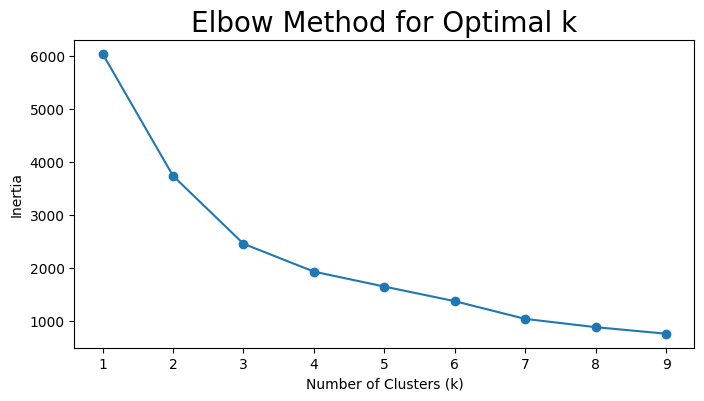

In [32]:
inertia = []

k_values = range(1, 10)  
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(umap_embeddings)
    inertia.append(kmeans.inertia_)

# Visualizar el metodo de codo
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=20)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.xticks(k_values)
plt.show()

In [55]:
# Utilizando el gráfico anterior se opta por utilizar k = 4
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(umap_embeddings)
df['cluster'] = clusters

#### Visualizacion de Clusters

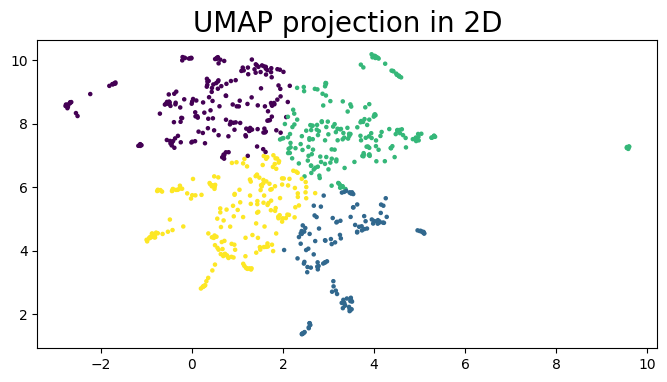

In [56]:
plt.figure(figsize=(8, 4))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clusters, s=5)
plt.title('UMAP projection in 2D', fontsize=20)
plt.show()

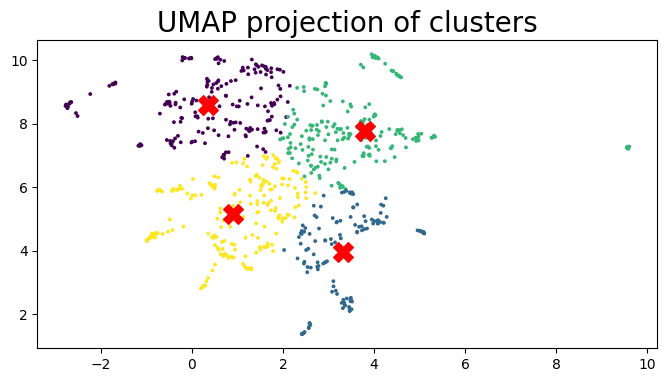

In [57]:
# Visualizacion de los centroides de cada cluster
plt.figure(figsize=(8, 4))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=3, c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('UMAP projection of clusters', fontsize=20)
plt.show()

In [58]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(umap_embeddings)


print(kmeans.cluster_centers_)  
print(kmeans.labels_)  
print(kmeans.inertia_) 
print(kmeans.n_iter_) 

[[0.8365557 5.047451 ]
 [0.3965764 8.552725 ]
 [3.7631574 7.6375785]
 [3.3030927 3.825131 ]]
[1 1 0 0 1 3 3 2 2 1 0 2 0 2 0 2 0 0 0 3 0 3 0 1 0 2 0 3 1 3 1 2 2 2 1 1 1
 1 3 2 1 1 3 3 3 3 3 1 1 1 0 3 1 3 2 2 2 2 0 1 1 1 1 0 1 2 0 0 0 3 3 1 1 1
 0 0 1 3 2 2 2 0 3 0 1 1 2 1 1 2 0 0 3 3 3 1 1 1 0 2 1 3 2 2 2 1 0 1 1 1 1
 0 1 2 0 3 0 0 1 1 0 2 1 3 1 2 2 1 0 0 0 1 2 0 1 2 3 0 3 0 0 1 1 1 0 2 1 1
 2 2 2 0 0 1 0 1 1 1 1 0 3 0 3 0 0 1 0 0 0 0 1 0 1 2 1 1 3 1 1 1 0 0 1 2 3
 0 3 0 0 1 3 0 0 0 1 1 1 2 1 2 2 0 1 1 0 0 1 2 3 0 3 0 0 1 3 0 0 0 1 1 1 2
 1 1 1 0 1 1 0 0 1 2 0 0 3 0 0 0 2 0 2 2 1 2 2 1 1 2 1 1 1 2 1 1 2 3 0 3 0
 0 1 0 1 3 2 2 1 1 2 1 0 1 1 2 1 2 3 0 3 0 0 1 0 0 2 1 2 1 2 2 2 1 2 2 1 3
 0 3 0 0 1 2 0 2 1 2 2 2 2 2 2 1 2 1 2 1 1 0 0 0 3 3 2 2 2 2 0 2 2 1 1 1 2
 1 2 0 0 0 3 3 2 2 1 0 0 0 2 1 1 0 1 1 2 0 0 2 3 3 1 2 1 2 0 0 2 1 0 1 1 2
 1 0 0 2 3 2 1 2 2 2 0 0 2 1 2 1 0 1 2 0 0 2 3 0 1 2 0 0 0 0 2 1 2 1 1 2 2
 0 0 2 3 0 1 3 1 1 0 0 2 1 1 1 1 0 3 0 2 3 2 2 0 0 2 2 3 1 2 0 0 2 3 0 2 1
 2 2 0 

#### Métricas de evaluación

* Coeficiente de silueta: Mide qué tan similar es un punto a su propio clúster en comparación con otros clústeres. Un valor alto indica una buena agrupación.
* Índice de Davies-Bouldin: Mide la relación entre la dispersión dentro de los clústeres y la separación entre ellos. Un valor bajo indica una buena agrupación.

In [59]:
print(silhouette_score(umap_embeddings, kmeans.labels_))
print(davies_bouldin_score(umap_embeddings, kmeans.labels_))

0.3806634
0.8934821940838503


En terminos generales ambas metricas indican una mala agrupacion, ello puede explicarse por la diferencia tanto de proyectos como los diferentes desafios que enfrentan cada uno. Ademas de la baja cantidad de datos utilizados. 

#### Análisis de Clusters

1. Se utilizarán Wordclouds para visualizar que contiene cada cluster
2. Se realizará análisis de sentimiento en cada cluster


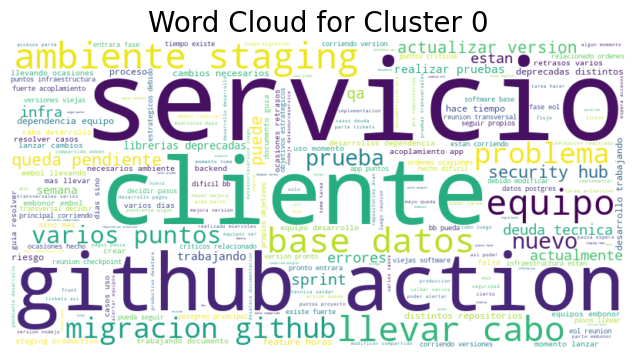

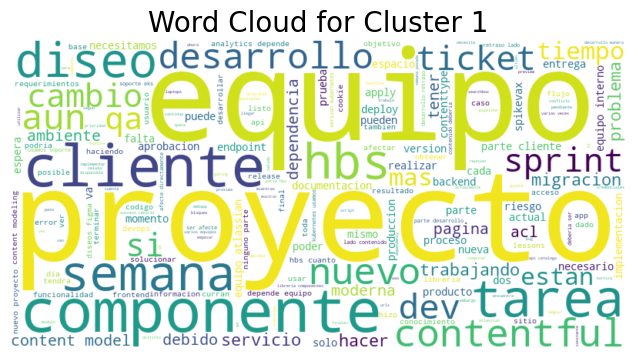

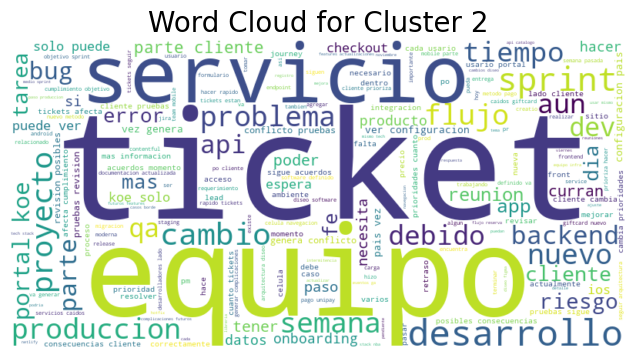

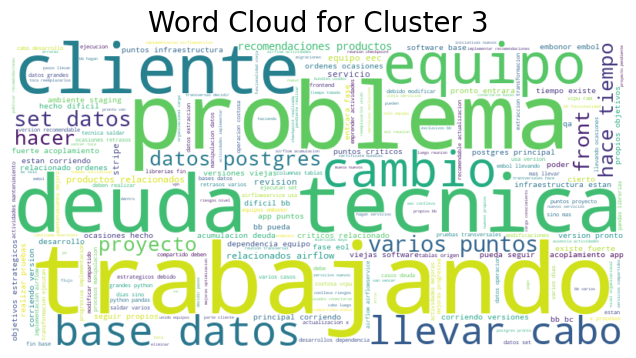

In [60]:
# Generate word clouds per cluster
for cluster_id in range(num_clusters):
    cluster_indices = [i for i, label in enumerate(kmeans.labels_) if label == cluster_id]
    cluster_texts = [string_list[i] for i in cluster_indices]

    all_text = ' '.join(cluster_texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_id}', fontsize=20)
    plt.show()

Analisis de Sentimiento

In [61]:
from textblob import TextBlob

def analyze_sentiment(text):

    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['RAIDD_filtered'].apply(analyze_sentiment)

sentiment_by_cluster = df.groupby('cluster')['sentiment'].mean()
print(sentiment_by_cluster)

cluster
0   -0.010878
1   -0.147769
2   -0.003799
3   -0.092051
Name: sentiment, dtype: float64


Interpretación de tus Resultados

1. Cluster 0: Este valor está muy cerca de 0, lo que indica que el sentimiento promedio del texto en este cluster es casi neutral, con una ligera tendencia negativa.
2. Cluster 1: Este valor es más negativo que el de los otros clusters, lo que sugiere que el sentimiento promedio del texto en este cluster es más negativo. Aunque no es extremadamente negativo, hay una tendencia perceptible hacia lo negativo.
3. Cluster 2: Similar a Cluster 0, este valor está muy cerca de 0, indicando un sentimiento promedio muy cercano a neutral, con una ligera inclinación hacia lo negativo.
4. Cluster 3: Este valor es también cercano a 0, indicando un sentimiento ligeramente negativo pero esencialmente neutral.
